In [1]:
from dtwhaclustering.dtw_analysis import dtw_signal_pairs, dtw_clustering
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from dtaidistance import dtw
import pandas as pd
import os
%matplotlib inline 

# default matplotlib parameters
import matplotlib
font = {'family': 'Times',
        'weight': 'bold',
        'size': 22}

matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use('ggplot')

In [2]:
#load pickle data
dataloc = "pickleFiles"

final_dU=pd.read_pickle(os.path.join(dataloc,"dU_wo_seasn.pickle"))
final_dN=pd.read_pickle(os.path.join(dataloc,"dN_wo_seasn.pickle"))
final_dE=pd.read_pickle(os.path.join(dataloc,"dE_wo_seasn.pickle"))

In [3]:
final_dU.head()

,DAWU_U,GS36_U,CTOU_U,HSIN_U,GS31_U,SSUN_U,SFON_U,GS23_U,VR03_U,SLNP_U,...,DOSH_U,W029_U,NSHE_U,HUWE_U,SHJU_U,DNAN_U,PKGM_U,SLIN_U,MESN_U,WULU_U
Time,,,,,,,,,,,,,,,,,,,,,
2007-01-01,3.908294,-0.081488,-3.049840,-4.673059,10.533776,-1.476313,8.673984,4.530060,13.409948,-8.877830,...,-19.377178,-3.788125,1.743015,130.023461,8.220618,66.794490,-30.720817,-3.034473,-3.599844,-57.474679
2007-01-02,10.500799,7.948431,1.318779,-0.743764,9.331000,3.753709,6.669562,4.629491,22.623746,3.637930,...,-8.896452,-6.097189,8.503721,137.846113,13.530092,70.849086,-24.866085,-12.179227,-14.733458,-47.341336
2007-01-03,4.008854,6.446352,4.105762,12.184217,9.198563,7.073537,6.987663,13.166624,12.013241,-4.880878,...,-22.097870,9.628858,2.767164,138.107636,16.818000,72.697599,-19.829117,-21.627860,-11.893865,-51.522350
2007-01-04,-0.031345,-0.846752,0.427601,-3.944638,6.705640,-2.433624,6.980915,5.301272,14.671148,-12.261464,...,-18.980924,-11.738634,-0.707047,129.183137,2.833268,66.621516,-31.362671,-29.660110,-19.988452,-59.711777
2007-01-05,-3.235729,2.166184,-3.995197,-6.788471,6.111140,-2.830265,-0.087687,3.937724,14.986668,-6.464705,...,-17.883469,-8.798023,-1.576212,128.433947,-2.769286,68.346757,-28.545909,-29.302730,-39.140370,-84.028366


In [4]:
stn_info_df = pd.read_csv('helper_files/selected_stations_info.txt')
lons = stn_info_df['lon'].values
lats = stn_info_df['lat'].values

### Subset of the vertical component data for plotting

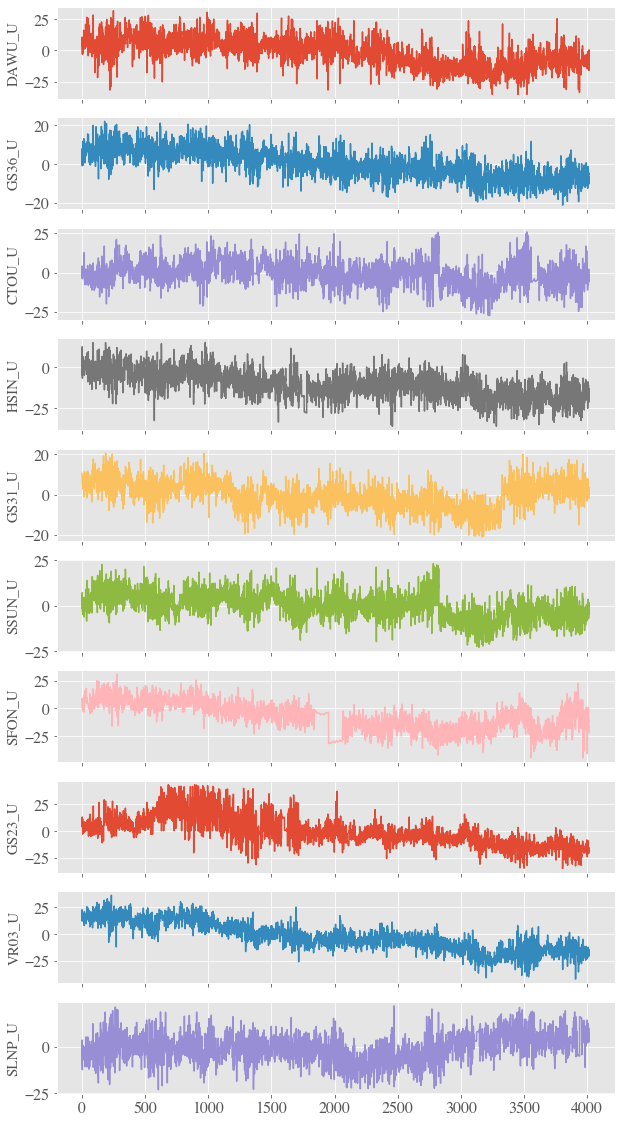

In [5]:
time_series_U_ex = final_dU.values.transpose()[:10,:] #10 stations only

## instantiate the class
dtw_cluster_vertical_ex = dtw_clustering(time_series_U_ex,labels=final_dU.columns.values[:10])

dtw_cluster_vertical_ex.plot_signals(figsize=(10, 20), fontsize=15)
plt.show()

### Convert the whole dataframe to numpy array

In [6]:
time_series_U = final_dU.values.transpose()
time_series_N = final_dN.values.transpose()
time_series_E = final_dE.values.transpose()


time_series_U.shape

(115, 4017)

### Perform DTW clustering on all data set

In [7]:
## instantiate the class
labels = [stnU.split("_")[0] for stnU in final_dU.columns.values] #remove the prefix _U
dtw_cluster_vertical = dtw_clustering(time_series_U,labels=labels, longitudes=lons, latitudes=lats)

In [ ]:
# instantiate the class, and saves the output as ps & pdf
dtw_cluster_vertical.plot_dendrogram(xtickfontsize=8, xlabel="Vertical Stations", ylabel="DTW Distance", figname="Figures/vertical_dtw_cluster_taiwan.png",leaf_rotation=90)

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.



In [ ]:
# dtw_cluster_north = dtw_clustering(time_series_N,labels=labels)
# dtw_cluster_north.plot_dendrogram(xtickfontsize=8, xlabel="North Stations", ylabel="DTW Distance", figname="Figures/north_dtw_cluster_taiwan.png",leaf_rotation=90)

In [ ]:
# dtw_cluster_east = dtw_clustering(time_series_E,labels=labels)
# dtw_cluster_east.plot_dendrogram(xtickfontsize=8, xlabel="East Stations", ylabel="DTW Distance", figname="Figures/east_dtw_cluster_taiwan.png",leaf_rotation=90)

In [ ]:
import ipyplot
images = []
for comp in ['vertical',"north","east"]:
    clusterFile=f'Figures/{comp}_dtw_cluster_taiwan.pdf'
    images.append(clusterFile)
ipyplot.plot_images(images, ['Vertical','North', 'East'], img_width=800)

In [ ]:
dtw_cluster_vertical.plot_hac_iteration(figname="Figures/vertical_iteration_gps_taiwan.png")

In [ ]:
ipyplot.plot_images(["Figures/vertical_iteration_gps_taiwan.png"], ['Vertical'], img_width=800)

## Selecting a Distance Cut-Off or Determining the Number of Clusters

In [ ]:
opt_cluster, opt_distance = dtw_cluster_vertical.optimum_cluster_elbow()
opt_cluster, opt_distance

In [ ]:
dtw_cluster_vertical.plot_optimum_cluster(xlim=[0,20])
plt.show()

In [ ]:
dtw_cluster_vertical.plot_cluster_xymap(max_d=1000, figname=None, xlabel='lons', ylabel='lats')
plt.show()